In [2]:
#HW1 #1
install.packages("faraway")
library(faraway)
library(tidyverse)

Installing package into ‘/home/hk-user/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [17]:
head(prostate)
str(prostate)
summary(prostate)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,-0.5798185,2.7695,50,-1.386294,0,-1.38629,6,0,-0.43078
2,-0.9942523,3.3196,58,-1.386294,0,-1.38629,6,0,-0.16252
3,-0.5108256,2.6912,74,-1.386294,0,-1.38629,7,20,-0.16252
4,-1.2039728,3.2828,58,-1.386294,0,-1.38629,6,0,-0.16252
5,0.7514161,3.4324,62,-1.386294,0,-1.38629,6,0,0.37156
6,-1.0498221,3.2288,50,-1.386294,0,-1.38629,6,0,0.76547


'data.frame':	97 obs. of  9 variables:
 $ lcavol : num  -0.58 -0.994 -0.511 -1.204 0.751 ...
 $ lweight: num  2.77 3.32 2.69 3.28 3.43 ...
 $ age    : int  50 58 74 58 62 50 64 58 47 63 ...
 $ lbph   : num  -1.39 -1.39 -1.39 -1.39 -1.39 ...
 $ svi    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ lcp    : num  -1.39 -1.39 -1.39 -1.39 -1.39 ...
 $ gleason: int  6 6 7 6 6 6 6 6 6 6 ...
 $ pgg45  : int  0 0 20 0 0 0 0 0 0 0 ...
 $ lpsa   : num  -0.431 -0.163 -0.163 -0.163 0.372 ...


     lcavol           lweight           age             lbph        
 Min.   :-1.3471   Min.   :2.375   Min.   :41.00   Min.   :-1.3863  
 1st Qu.: 0.5128   1st Qu.:3.376   1st Qu.:60.00   1st Qu.:-1.3863  
 Median : 1.4469   Median :3.623   Median :65.00   Median : 0.3001  
 Mean   : 1.3500   Mean   :3.653   Mean   :63.87   Mean   : 0.1004  
 3rd Qu.: 2.1270   3rd Qu.:3.878   3rd Qu.:68.00   3rd Qu.: 1.5581  
 Max.   : 3.8210   Max.   :6.108   Max.   :79.00   Max.   : 2.3263  
      svi              lcp             gleason          pgg45       
 Min.   :0.0000   Min.   :-1.3863   Min.   :6.000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:-1.3863   1st Qu.:6.000   1st Qu.:  0.00  
 Median :0.0000   Median :-0.7985   Median :7.000   Median : 15.00  
 Mean   :0.2165   Mean   :-0.1794   Mean   :6.753   Mean   : 24.38  
 3rd Qu.:0.0000   3rd Qu.: 1.1786   3rd Qu.:7.000   3rd Qu.: 40.00  
 Max.   :1.0000   Max.   : 2.9042   Max.   :9.000   Max.   :100.00  
      lpsa        
 Min.   :-0.430

In [25]:
colnames(prostate)[colnames(prostate) != "svi"]
1:length(colnames(prostate))

[1] "lcavol"  "lweight" "age"     "lbph"    "lcp"     "gleason" "pgg45"  
[8] "lpsa"

[1] 1 2 3 4 5 6 7 8 9

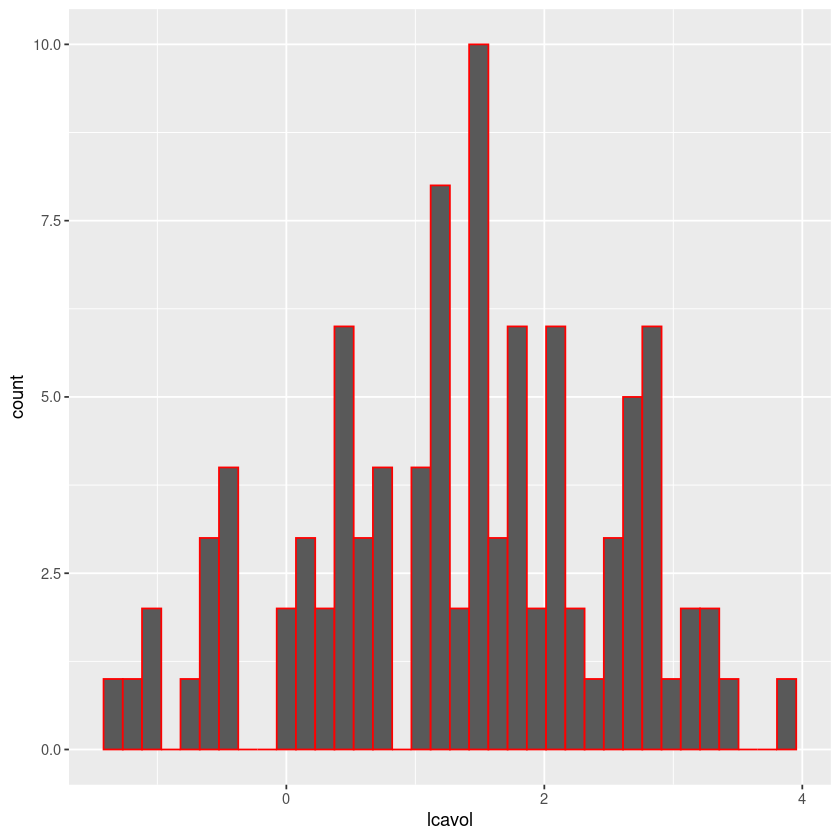

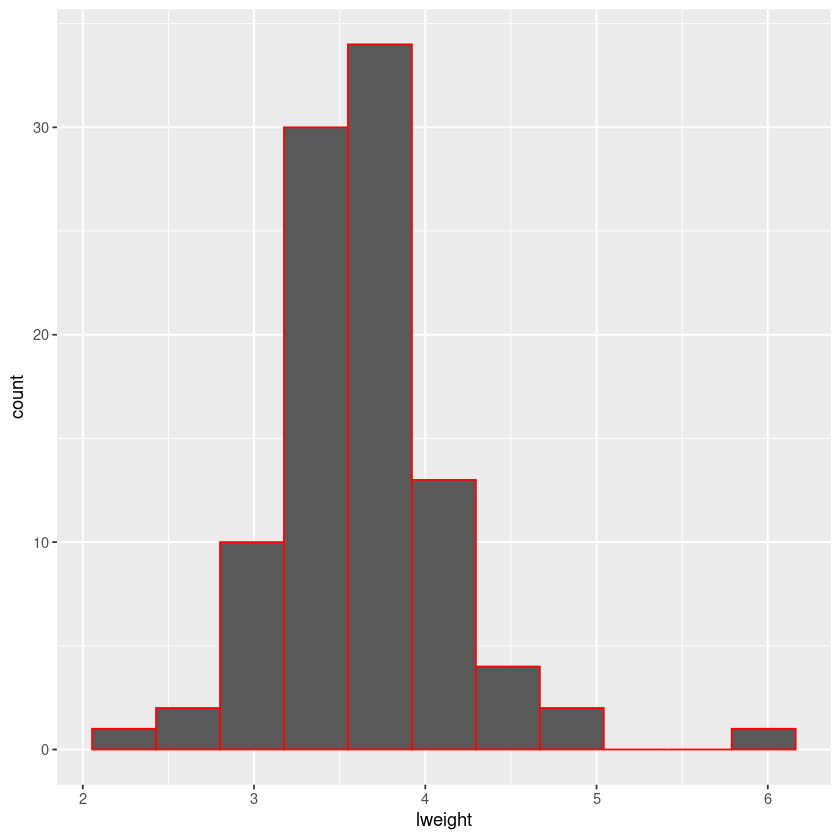

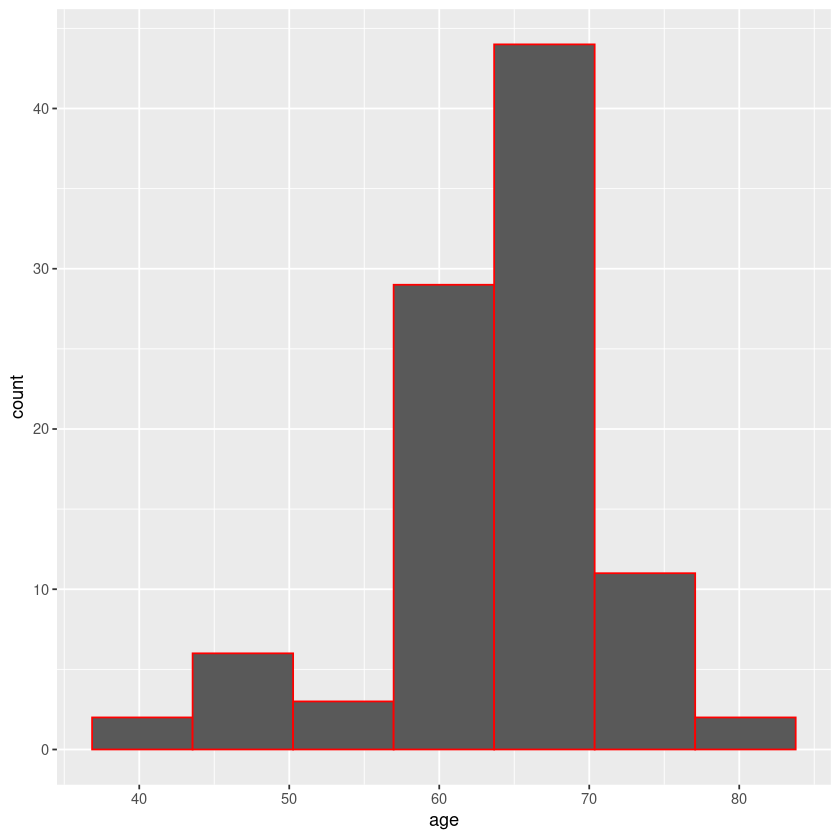

Warning message:
“Computation failed in `stat_bin()`:
`binwidth` must be positive”


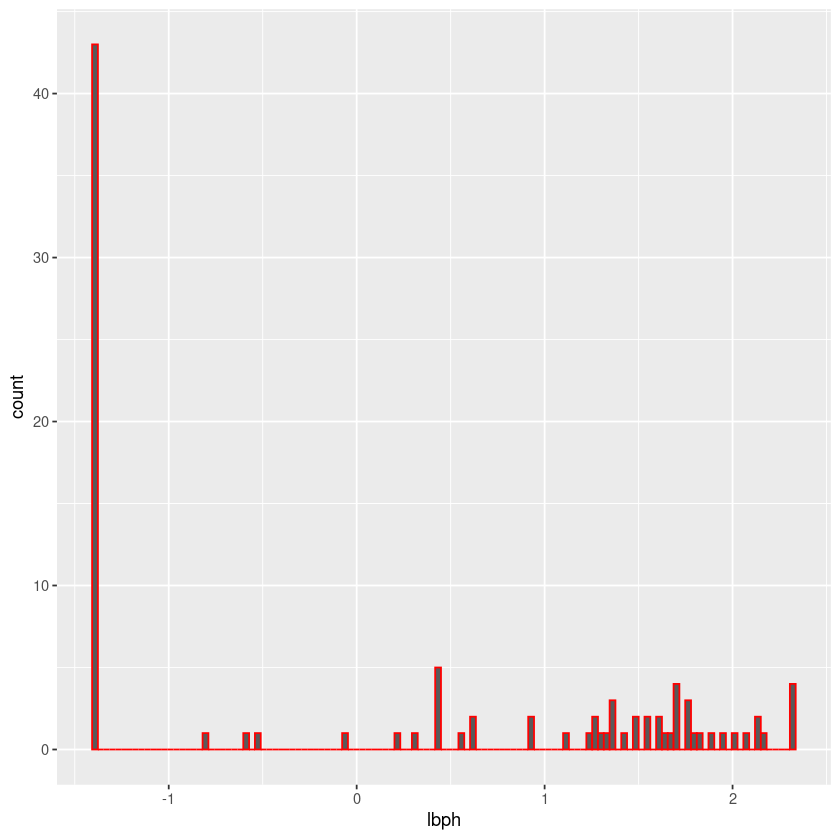

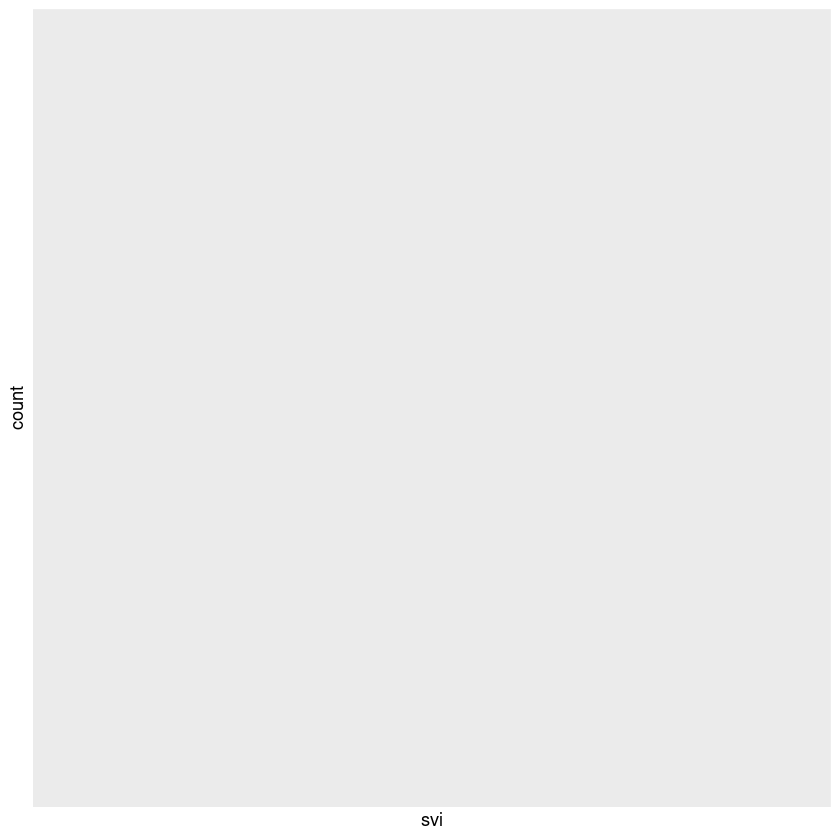

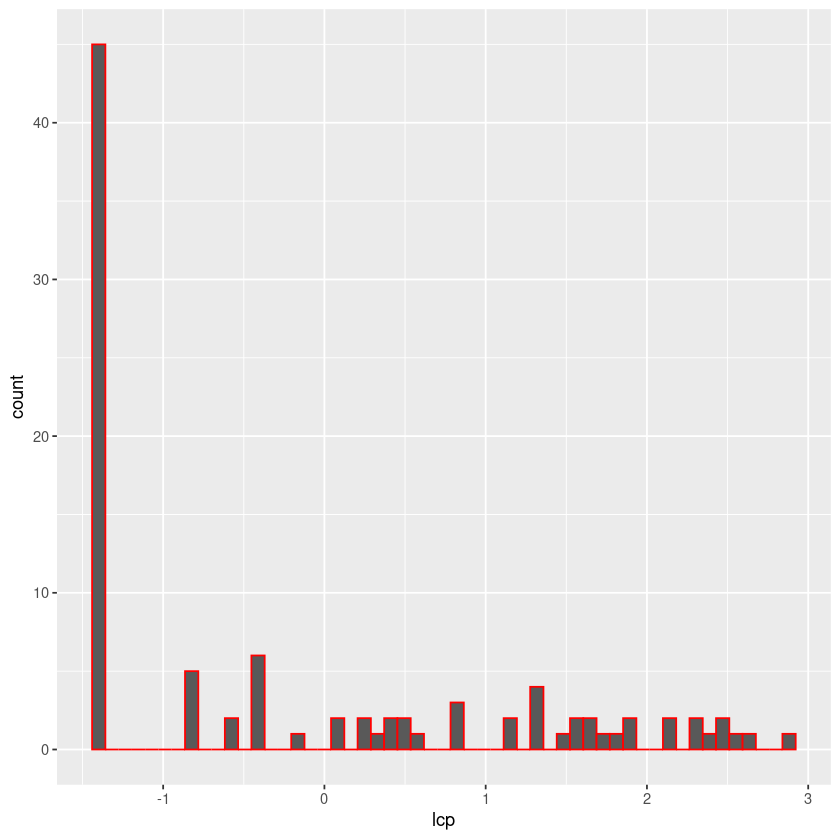

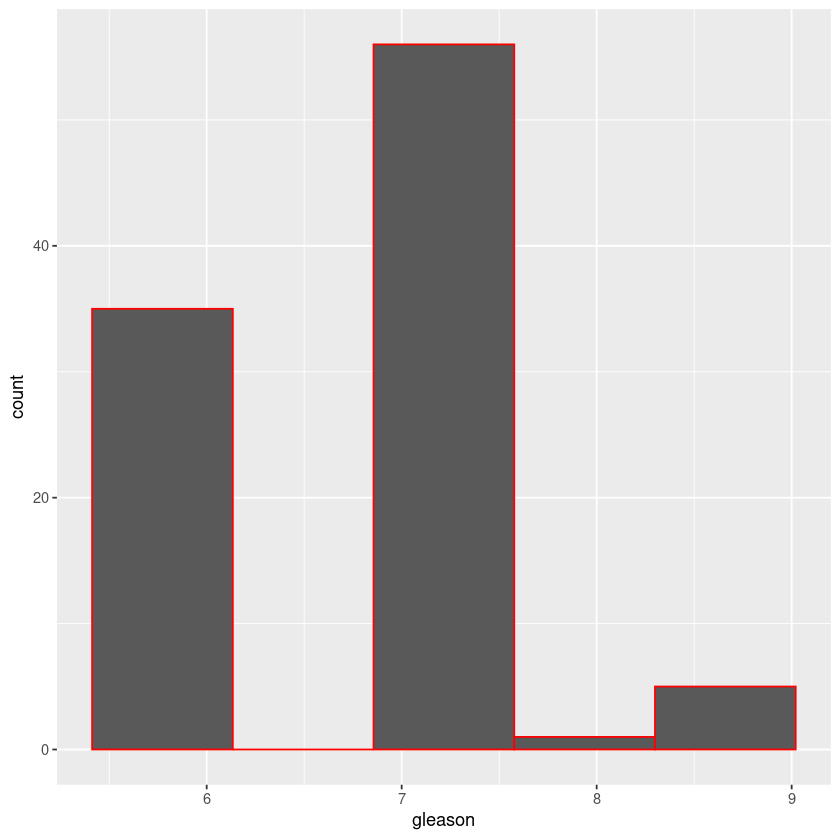

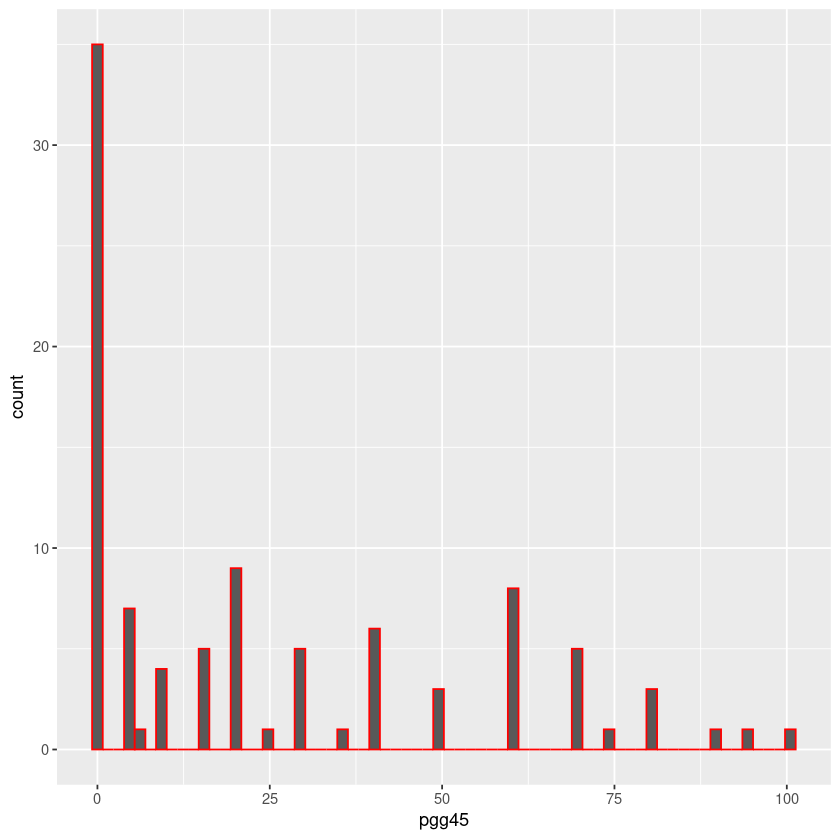

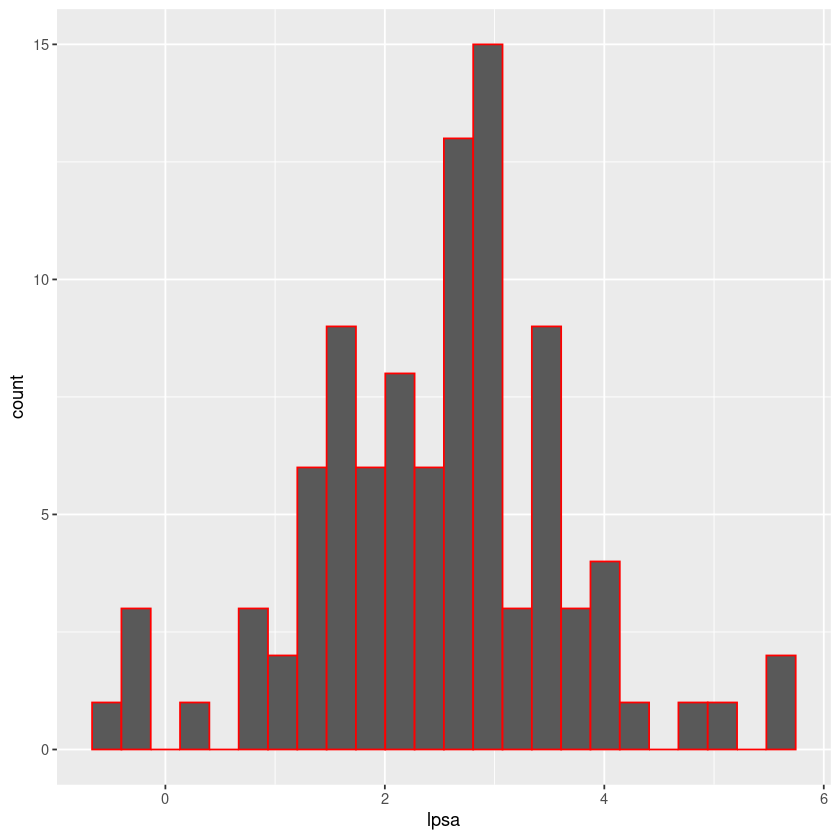

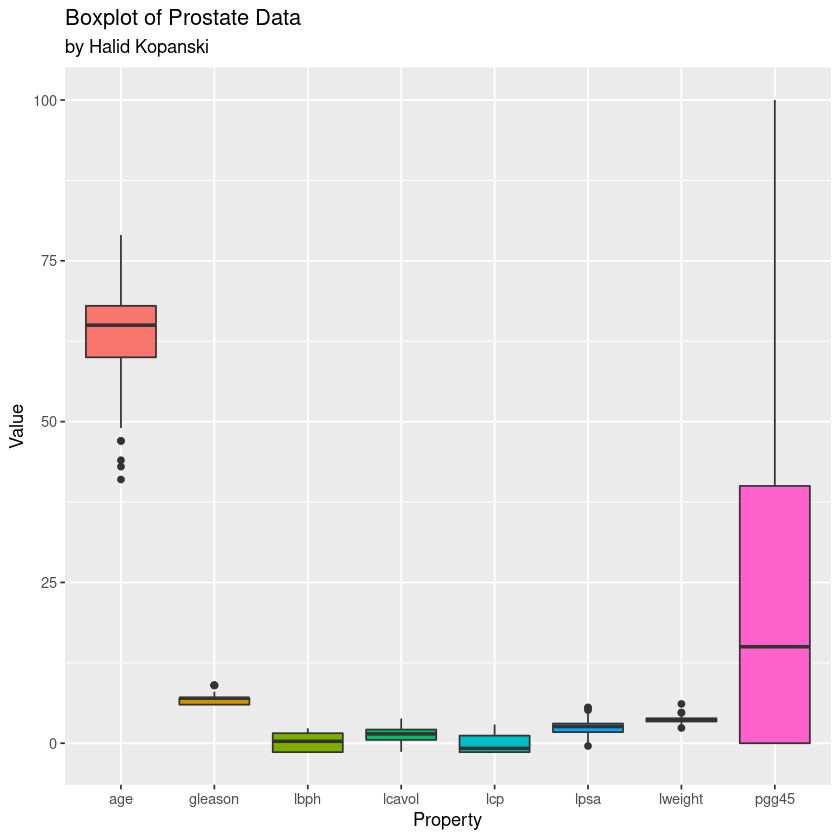

In [16]:
#a
for (i in 1:length(colnames(prostate))){
    print(ggplot(prostate) + geom_histogram(aes(prostate[,i]), binwidth = 10*abs(median(prostate[,i]))/length(prostate[,i]), col = "red") +
         labs(x = colnames(prostate)[i]))
}

prostate %>% pivot_longer(-svi, names_to = "Property", values_to = "Values") %>% 
ggplot() + geom_boxplot(aes(x = Property, y = Values, fill = Property)) + 
labs(x = "Property", y = "Value", title = "Boxplot of Prostate Data", subtitle = "by Halid Kopanski") +
theme(legend.position = "none")

In [6]:
colnames(prostate)

prostate %>% pivot_longer(-svi, names_to = "Property", values_to = "Values") %>% group_by(Property) %>% 
mutate(outlier = !between(Values, as.numeric(quantile(Values)[2]) - 1.5 * IQR(Values), as.numeric(quantile(Values)[4]) + 1.5 * IQR(Values))) %>%
summarise(mean = mean(Values), 
          iqr = IQR(Values),
          upper = as.numeric(quantile(Values)[2]) - 1.5 * IQR(Values),
          lower = as.numeric(quantile(Values)[4]) + 1.5 * IQR(Values),
          no_outliers = sum(outlier)) %>% knitr::kable()  



[1] "lcavol"  "lweight" "age"     "lbph"    "svi"     "lcp"     "gleason"
[8] "pgg45"   "lpsa"



|Property |       mean|       iqr|      upper|      lower| no_outliers|
|:--------|----------:|---------:|----------:|----------:|-----------:|
|age      | 63.8659794|  8.000000|  48.000000|  80.000000|           5|
|gleason  |  6.7525773|  1.000000|   4.500000|   8.500000|           5|
|lbph     |  0.1003558|  2.944439|  -5.802952|   5.974804|           0|
|lcavol   |  1.3500096|  1.614217|  -1.908502|   4.548366|           0|
|lcp      | -0.1793637|  2.564940|  -5.233700|   5.026060|           0|
|lpsa     |  2.4783870|  1.324700|  -0.255390|   5.043410|           4|
|lweight  |  3.6526887|  0.502600|   2.622000|   4.632400|           4|
|pgg45    | 24.3814433| 40.000000| -60.000000| 100.000000|           0|


 0  1 
76 21 

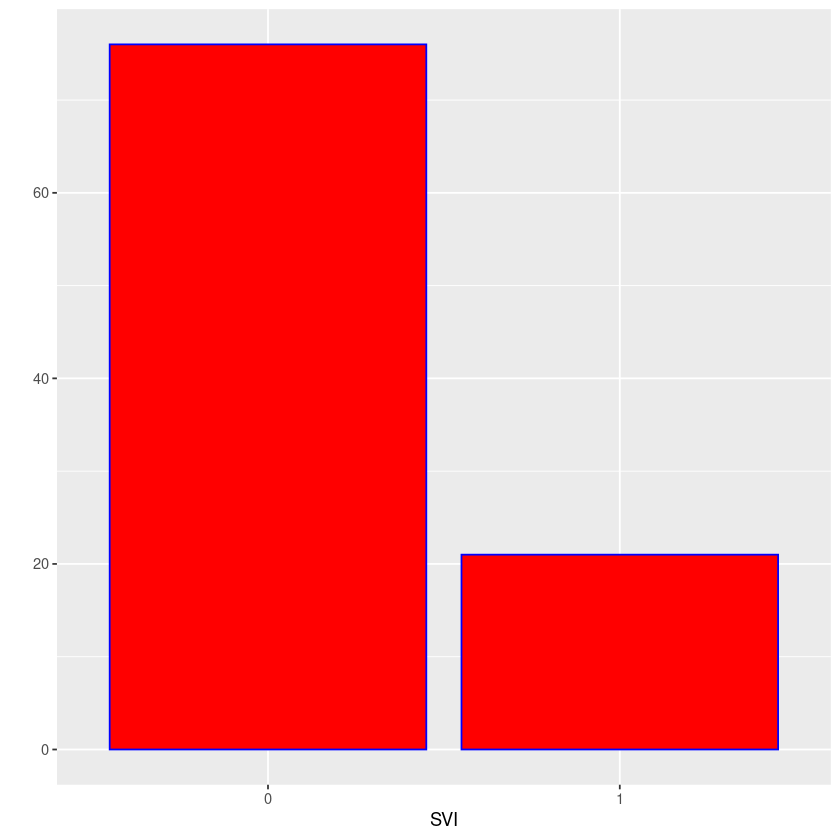

In [70]:
table(prostate$svi)

ggplot(prostate) + geom_bar(aes(as.factor(svi)), fill = "red", col = "blue") + labs(x = "SVI", y = "")

In [60]:
sum(!between(prostate$age, as.numeric(quantile(prostate$age)[2]) - 1.5 * IQR(prostate$age), as.numeric(quantile(prostate$age)[4]) + 1.5 * IQR(prostate$age)))

[1] 5

In [42]:
#2.1 from book

teengamb %>% head()
summary(teengamb)

,sex,status,income,verbal,gamble
,<int>,<int>,<dbl>,<int>,<dbl>
1,1,51,2.00,8,0.0
2,1,28,2.50,8,0.0
3,1,37,2.00,6,0.0
4,1,28,7.00,4,7.3
5,1,65,2.00,8,19.6
6,1,61,3.47,6,0.1


      sex             status          income           verbal     
 Min.   :0.0000   Min.   :18.00   Min.   : 0.600   Min.   : 1.00  
 1st Qu.:0.0000   1st Qu.:28.00   1st Qu.: 2.000   1st Qu.: 6.00  
 Median :0.0000   Median :43.00   Median : 3.250   Median : 7.00  
 Mean   :0.4043   Mean   :45.23   Mean   : 4.642   Mean   : 6.66  
 3rd Qu.:1.0000   3rd Qu.:61.50   3rd Qu.: 6.210   3rd Qu.: 8.00  
 Max.   :1.0000   Max.   :75.00   Max.   :15.000   Max.   :10.00  
     gamble     
 Min.   :  0.0  
 1st Qu.:  1.1  
 Median :  6.0  
 Mean   : 19.3  
 3rd Qu.: 19.4  
 Max.   :156.0  

In [50]:
lin_model <- lm(gamble ~ ., data = teengamb)

summary(lin_model)


Call:
lm(formula = gamble ~ ., data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.082 -11.320  -1.451   9.452  94.252 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.55565   17.19680   1.312   0.1968    
sex         -22.11833    8.21111  -2.694   0.0101 *  
status        0.05223    0.28111   0.186   0.8535    
income        4.96198    1.02539   4.839 1.79e-05 ***
verbal       -2.95949    2.17215  -1.362   0.1803    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.69 on 42 degrees of freedom
Multiple R-squared:  0.5267,	Adjusted R-squared:  0.4816 
F-statistic: 11.69 on 4 and 42 DF,  p-value: 1.815e-06


In [56]:
lin_teengamb <- lm(gamble ~ status + income + verbal, data = teengamb)
anova_teengamb <- anova(lin_teengamb)

In [59]:
print(summary(lin_teengamb))
print(anova_teengamb)


Call:
lm(formula = gamble ~ status + income + verbal, data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.649 -12.008  -1.242   8.239 103.390 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.3044    15.7760  -0.083   0.9345    
status        0.4701     0.2509   1.873   0.0678 .  
income        5.7707     1.0494   5.499 1.95e-06 ***
verbal       -4.1211     2.2785  -1.809   0.0775 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.28 on 43 degrees of freedom
Multiple R-squared:  0.445,	Adjusted R-squared:  0.4062 
F-statistic: 11.49 on 3 and 43 DF,  p-value: 1.161e-05

Analysis of Variance Table

Response: gamble
          Df  Sum Sq Mean Sq F value    Pr(>F)    
status     1   116.2   116.2  0.1970    0.6594    
income     1 18284.5 18284.5 31.0035 1.548e-06 ***
verbal     1  1929.3  1929.3  3.2713    0.0775 .  
Residuals 43 25359.6   589.8                      
---
Signif. codes

In [62]:
names(anova_teengamb)

[1] "Df"      "Sum Sq"  "Mean Sq" "F value" "Pr(>F)"

In [61]:
# 2.6

cheddar %>% head()

,taste,Acetic,H2S,Lactic
,<dbl>,<dbl>,<dbl>,<dbl>
1,12.3,4.543,3.135,0.86
2,20.9,5.159,5.043,1.53
3,39.0,5.366,5.438,1.57
4,47.9,5.759,7.496,1.81
5,5.6,4.663,3.807,0.99
6,25.9,5.697,7.601,1.09
